# Import The Necessary Libraries


In [90]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification,make_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import optuna
from optuna.samplers import GridSampler,RandomSampler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,classification_report,log_loss,roc_auc_score

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Loading the dataset:

In [91]:
credit_train_data=pd.read_csv(r"C:\Users\ASUS\Downloads\train1.csv\train.csv")

In [92]:
credit_train_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


## Feature Descriptions:
| Column Name                    | Description                                                                                      |
| ------------------------------ | ------------------------------------------------------------------------------------------------ |
| **ID**                         | Unique hexadecimal ID per record. Can be dropped.                                                |
| **Customer\_ID**               | Unique identifier for a customer across months. Useful for grouping data by person.              |
| **Month**                      | The month of the record. Categorical time feature.                                               |
| **Name**                       | Customer's full name. Often dropped to preserve privacy.                                         |
| **Age**                        | Age of the customer. Some entries are malformed or invalid (e.g., negative values).              |
| **SSN**                        | Social Security Number (sensitive ID). Typically dropped or anonymized.                          |
| **Occupation**                 | Customer’s job role or profession. Categorical.                                                  |
| **Annual\_Income**             | Total annual income. Should be numeric, but currently needs cleaning.                            |
| **Monthly\_Inhand\_Salary**    | Monthly salary received after deductions. Numeric (some missing).                                |
| **Num\_Bank\_Accounts**        | Number of active bank accounts. Integer.                                                         |
| **Num\_Credit\_Card**          | Number of credit cards owned. Integer.                                                           |
| **Interest\_Rate**             | Interest rate on borrowed loans. Numeric. High rates could indicate risky profiles.              |
| **Num\_of\_Loan**              | Total number of loans taken. Currently object — needs conversion.                                |
| **Type\_of\_Loan**             | Types of loans held (e.g., Credit-Card, Auto, Home). Many values per customer.                   |
| **Delay\_from\_due\_date**     | Average number of days payments are delayed beyond due dates.                                    |
| **Num\_of\_Delayed\_Payment**  | Total number of payments delayed. Needs cleaning (currently object type).                        |
| **Changed\_Credit\_Limit**     | How much the credit limit has changed recently. Numeric but malformed.                           |
| **Num\_Credit\_Inquiries**     | Number of times the customer applied for credit. High values may imply credit hunger.            |
| **Credit\_Mix**                | Quality of the credit mix (e.g., Good, Standard, Bad). Categorical.                              |
| **Outstanding\_Debt**          | Current unpaid debt amount. Should be numeric.                                                   |
| **Credit\_Utilization\_Ratio** | Ratio of used credit to total available credit. Important creditworthiness factor.               |
| **Credit\_History\_Age**       | Duration of credit history (e.g., “22 Years and 3 Months”). Needs parsing to numeric.            |
| **Payment\_of\_Min\_Amount**   | Whether the user regularly pays the minimum amount due. Categories: Yes, No, NM (Not Mentioned). |
| **Total\_EMI\_per\_month**     | Total Equated Monthly Installments being paid. Numeric.                                          |
| **Amount\_invested\_monthly**  | Average monthly investment made by the customer. Needs cleaning.                                 |
| **Payment\_Behaviour**         | Spending and payment pattern (e.g., High\_spent\_Small\_value\_payments). Categorical.           |
| **Monthly\_Balance**           | End-of-month account balance. Some values are corrupted — needs cleaning.                        |
| **Credit\_Score**              | Target variable. Categories: `Poor`, `Standard`, `Good`. Classification target.                  |


## Inspect or Exploring the data :

In [93]:
#First 5 rows of training data 
credit_train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [94]:
credit_train_data.shape

(100000, 28)

In [95]:
credit_train_data["Age"].unique()[:40]

array(['23', '-500', '28_', '28', '34', '54', '55', '21', '31', '33',
       '34_', '7580', '30', '30_', '24', '24_', '44', '45', '40', '41',
       '32', '33_', '35', '35_', '36', '39', '37', '181', '20', '46',
       '26', '42', '19', '31_', '48', '995', '40_', '37_', '38', '54_'],
      dtype=object)

In [96]:
credit_train_data["Customer_ID"].nunique()

12500

In [97]:
print(credit_train_data.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [98]:
credit_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [99]:
credit_train_data["Num_of_Loan"].unique()[:20]
credit_train_data["Num_of_Delayed_Payment"].unique()[:20]
credit_train_data["Changed_Credit_Limit"].unique()[:20]
credit_train_data["Credit_Mix"].unique()[:20]
credit_train_data["Credit_History_Age"].unique()[:20]
credit_train_data["Amount_invested_monthly"].unique()[:20]
credit_train_data["Monthly_Balance"].unique()[:20]

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_'], dtype=object)

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11'], dtype=object)

array(['11.27', '_', '6.27', '9.27', '5.42', '7.42', '6.42', '7.1',
       '11.1', '9.1', '1.99', '-2.01', '-1.01', '-3.01', '2.58', '10.14',
       '9.14', '9.34', '15.34', '8.34'], dtype=object)

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months'], dtype=object)

array(['80.41529543900253', '118.28022162236736', '81.699521264648',
       '199.4580743910713', '41.420153086217326', '62.430172331195294',
       '178.3440674122349', '24.785216509052056', '104.291825168246',
       '40.39123782853101', '58.51597569589465', '99.30622796053305',
       '130.11542024292334', '43.477190144355745', '70.10177420755677',
       '218.90434353388733', '168.413702679309', '232.86038375993544',
       '__10000__', '825.2162699393922'], dtype=object)

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       '223.45130972736786', '341.48923103222177', '340.4792117872438',
       '244.5653167062043', '358.12416760938714', '470.69062692529184',
       '484.5912142650067', '466.46647639764313', '465.6762241330048',
       '444.8670318506144', '481.505261949182', '464.8806778859809',
       '356.07810855965045', '1043.3159778669492', '998.8692967863226',
       '715.741367403555', '426.5134106068658'], dtype=object)

### Need to handle datatypes of `Age`, `Annual_Income`, `Num_of_Delayed_Payment`, `Credit_Mix`, `Amount_invested_monthly` and `Monthly_Balance`.
### Also Need to handle __ values in columns.

In [100]:
credit_train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [101]:
credit_train_data["SSN"].nunique()

12501

In [102]:
# sns.barplot(x='Occupation',y="count", hue='Credit_Score', data=credit_train_data)

In [103]:
credit_train_data["Age"][credit_train_data['Age'].str.contains('_')].unique()

array(['28_', '34_', '30_', '24_', '33_', '35_', '31_', '40_', '37_',
       '54_', '21_', '20_', '43_', '38_', '18_', '2111_', '46_', '16_',
       '19_', '47_', '53_', '25_', '27_', '55_', '42_', '48_', '49_',
       '50_', '32_', '22_', '17_', '29_', '15_', '51_', '26_', '39_',
       '14_', '36_', '44_', '7670_', '45_', '23_', '41_', '52_', '733_',
       '5769_', '4383_', '56_', '2650_', '3307_', '6962_', '5589_',
       '6556_', '1447_', '8153_', '3834_', '6744_', '6471_', '7723_',
       '7640_', '6408_', '3502_', '7316_', '1102_', '8669_', '2463_',
       '6666_', '3055_', '1248_', '2220_', '2159_', '4583_', '3988_',
       '2155_', '6770_', '1843_', '1367_', '3742_', '2171_', '5109_',
       '3984_', '2474_', '5046_', '7715_', '2329_', '707_', '844_',
       '2756_', '2037_', '902_', '8523_', '3640_', '3998_', '3712_',
       '2097_', '8348_', '5373_', '3291_', '2994_', '3339_', '2812_',
       '3578_', '3564_', '1794_', '737_', '4301_', '2846_', '2373_',
       '1188_', '8207

In [104]:
credit_train_data["Age"] = credit_train_data["Age"].str.replace('_', '', regex=False)
credit_train_data["Age"] = credit_train_data["Age"].astype("int32")

In [105]:
credit_train_data[credit_train_data["Age"]==14] # Lowest Age

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
408,0x1866,CUS_0xb986,January,Simon Jessope,14,180-88-7800,Developer,39887.22,3224.935000,9,...,Bad,3119.6,30.188059,12 Years and 5 Months,Yes,133.470845,198.9967507987873,Low_spent_Medium_value_payments,270.0259039577801,Poor
409,0x1867,CUS_0xb986,February,Simon Jessope,14,180-88-7800,Developer,39887.22,3224.935000,9,...,_,3119.6,26.112222,12 Years and 6 Months,Yes,133.470845,153.2707254403229,!@9#%8,295.7519293162445,Poor
410,0x1868,CUS_0xb986,March,NaN,14,180-88-7800,Developer,39887.22,3224.935000,9,...,_,3119.6,38.238966,12 Years and 7 Months,Yes,133.470845,319.49237384558035,Low_spent_Small_value_payments,159.53028091098705,Poor
411,0x1869,CUS_0xb986,April,Simon Jessope,14,180-88-7800,Developer,39887.22,3224.935000,9,...,Bad,3119.6,37.089604,12 Years and 8 Months,NM,133.470845,NaN,Low_spent_Small_value_payments,176.93147792084778,Poor
412,0x186a,CUS_0xb986,May,Simon Jessope,14,180-88-7800,Developer,39887.22,3224.935000,9,...,Bad,3119.6,36.970608,12 Years and 9 Months,Yes,133.470845,96.09548178258156,High_spent_Medium_value_payments,342.9271729739859,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98051,0x25485,CUS_0x5602,April,James Tophamy,14,878-33-5924,Writer,15360.58,NaN,6,...,_,1521.43,38.365436,11 Years and 11 Months,Yes,20.753796,100.08450936870008,Low_spent_Small_value_payments,267.2665282537801,Poor
98052,0x25486,CUS_0x5602,May,James Tophamy,14,878-33-5924,Writer,15360.58,981.048333,6,...,Standard,1521.43,30.398461,12 Years and 0 Months,Yes,20.753796,99.01106230828873,Low_spent_Small_value_payments,268.3399753141914,Poor
98053,0x25487,CUS_0x5602,June,NaN,14,878-33-5924,Writer,15360.58_,981.048333,6,...,Standard,1521.43,38.597860,12 Years and 1 Months,Yes,20.753796,89.35808429379891,!@9#%8,267.9929533286813,Poor
98054,0x25488,CUS_0x5602,July,James Tophamy,14,878-33-5924,Writer,15360.58,981.048333,6,...,Standard,1521.43,33.738647,12 Years and 2 Months,Yes,20.753796,77.20541549925049,Low_spent_Medium_value_payments,280.14562212322966,Poor


In [106]:
credit_train_data['Age'] = credit_train_data['Age'].mask(credit_train_data['Age'] < 0, np.nan) # replacing all the negative values with Nan
credit_train_data["Age"] = credit_train_data["Age"].mask(credit_train_data["Age"]>100,np.nan) # replacing values greater than 120 with Nan

In [107]:
# credit_train_data[credit_train_data.isna().sum(axis=1) > (credit_train_data.shape[1] / 2)]

In [108]:
# Filling Missing values in Age column using group by customer_id

In [109]:
credit_train_data['Age'] = credit_train_data['Age'].fillna(credit_train_data.groupby('Customer_ID')['Age'].transform('median'))

In [110]:
credit_train_data["Age"] = credit_train_data["Age"].astype("int32")
credit_train_data["Age"].isna().sum()

0

<Axes: xlabel='Age', ylabel='Count'>

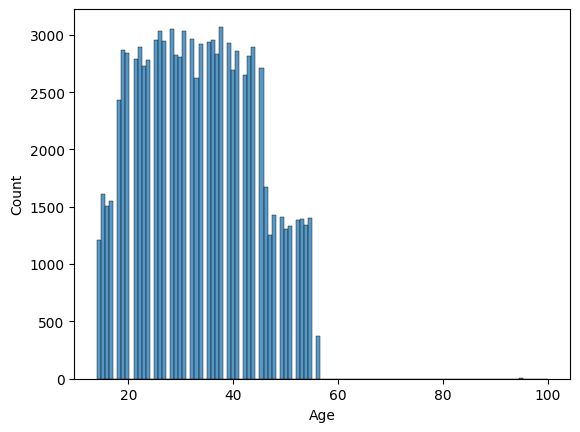

In [111]:
sns.histplot(credit_train_data["Age"])

In [112]:
credit_train_data[credit_train_data["Customer_ID"]=="CUS_0xd40"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [113]:
credit_train_data[credit_train_data["Age"]>120]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [114]:
credit_train_data["Outstanding_Debt"] = (
    credit_train_data["Outstanding_Debt"]
    .str.replace('_', '', regex=False)       
    .astype("float32")                       
    .round(2)                                
)

In [115]:
credit_train_data["Outstanding_Debt"].isnull().sum()

0

In [116]:
credit_train_data["Num_of_Loan"] = credit_train_data["Num_of_Loan"].str.replace('_', '', regex=False) 
credit_train_data["Num_of_Loan"] = credit_train_data["Num_of_Loan"].astype("int32")

In [117]:
credit_train_data["Num_of_Loan"].unique()[:20]

array([   4,    1,    3,  967, -100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352,  472, 1017,  945,  146,  563])

In [118]:
credit_train_data['Num_of_Loan'] = credit_train_data['Num_of_Loan'].mask((credit_train_data['Num_of_Loan'] < 0) | (credit_train_data['Num_of_Loan'] > 10)
, np.nan)

In [119]:
credit_train_data['Num_of_Loan'] = credit_train_data['Num_of_Loan'].fillna(credit_train_data.groupby('Customer_ID')['Num_of_Loan'].transform('median'))

In [120]:
credit_train_data["Num_of_Delayed_Payment"].isna().sum()

7002

In [121]:
credit_train_data["Num_of_Delayed_Payment"] = credit_train_data["Num_of_Delayed_Payment"].str.replace('_', '', regex=False)
credit_train_data["Num_of_Delayed_Payment"] = credit_train_data["Num_of_Delayed_Payment"].astype("float32")

In [122]:
credit_train_data[credit_train_data["Num_of_Delayed_Payment"]>30]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
252,0x177a,CUS_0x6048,May,Ayeshaz,43,425-47-6723,Musician,18627.64,NaN,7,...,Bad,1793.540039,25.585205,19 Years and 1 Months,Yes,65.139488,24.34618840548105,High_spent_Large_value_payments,289.24465715224005,Poor
284,0x17aa,CUS_0x9b94,May,Bri,36,734-54-7098,Manager,71681.4,5799.450000,3,...,Standard,1293.020020,40.791137,25 Years and 11 Months,Yes,53.923514,__10000__,!@9#%8,358.0953999823698,Good
304,0x17ca,CUS_0x42ac,January,Lawrencea,36,700-60-3660,Musician,15566.02,1423.168333,8,...,Standard,1693.949951,37.409934,7 Years and 10 Months,Yes,43.070520,65.9865855206332,Low_spent_Small_value_payments,323.25972821038425,Poor
409,0x1867,CUS_0xb986,February,Simon Jessope,14,180-88-7800,Developer,39887.22,3224.935000,9,...,_,3119.600098,26.112222,12 Years and 6 Months,Yes,133.470845,153.2707254403229,!@9#%8,295.7519293162445,Poor
643,0x19c5,CUS_0x78e0,April,Tagarish,47,352-67-4436,Accountant,17787.34,1242.278333,8,...,Standard,730.900024,34.903092,30 Years and 0 Months,NM,20.063634,28.516043623264604,High_spent_Medium_value_payments,325.6481558257138,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99133,0x25adb,CUS_0xbb53,June,Mutikanix,31,671-00-6399,Lawyer,77633.04,6635.420000,7,...,Bad,3392.649902,32.025465,0 Years and 9 Months,Yes,227.777065,106.0151257315186,High_spent_Large_value_payments,569.74981,Poor
99402,0x25c70,CUS_0x7b65,March,Sineadv,27,751-96-2010,Mechanic,8968.555,880.379583,10,...,Bad,2502.860107,38.044111,11 Years and 5 Months,Yes,57.078833,93.64788691228595,Low_spent_Small_value_payments,227.311238,Poor
99562,0x25d60,CUS_0x650,March,Raymondn,28,487-65-9318,Lawyer,21471.58_,1879.298333,7,...,Standard,68.059998,40.940335,23 Years and 9 Months,No,23.498319,33.19249006270337,High_spent_Small_value_payments,391.239024,Standard
99563,0x25d61,CUS_0x650,April,Raymondn,28,487-65-9318,Lawyer,21471.58,1879.298333,7,...,Standard,68.059998,31.039063,23 Years and 10 Months,No,23.498319,12.340387516702542,!@9#%8,392.091127,Standard


In [123]:
credit_train_data["Num_of_Delayed_Payment"] = credit_train_data["Num_of_Delayed_Payment"].fillna(
    credit_train_data.groupby("Customer_ID")["Num_of_Delayed_Payment"].transform("max")
)

In [124]:
credit_train_data["Num_of_Delayed_Payment"] = credit_train_data["Num_of_Delayed_Payment"].astype("int")

In [125]:
credit_train_data[credit_train_data["Changed_Credit_Limit"]=="_"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.979980,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
65,0x1663,CUS_0x4157,February,Charlie Zhur,23,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.739990,27.626325,21 Years and 5 Months,NM,226.892792,212.23560220847847,High_spent_Large_value_payments,785.2583558699787,Good
66,0x1664,CUS_0x4157,March,Charlie Zhur,23,070-19-1622,Doctor,114838.41_,NaN,2,...,Good,1377.739990,35.141567,21 Years and 6 Months,NM,226.892792,470.3857956796373,High_spent_Small_value_payments,547.1081623988198,Good
109,0x16a3,CUS_0x6c66,June,NaN,39,328-33-6328,Manager,8701.545,519.128750,6,...,Standard,2602.689941,28.570031,9 Years and 4 Months,Yes,36.548197,52.931613407134115,Low_spent_Medium_value_payments,242.43306442147872,Poor
110,0x16a4,CUS_0x6c66,July,NaN,39,328-33-6328,Manager,8701.545,NaN,6,...,Standard,2602.689941,38.465415,NaN,Yes,36.548197,30.471806299271933,Low_spent_Medium_value_payments,264.8928715293409,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99548,0x25d4a,CUS_0x2637,May,NaN,28,272-33-1370,Writer,29090.5,2472.208333,5,...,_,1612.699951,26.151395,16 Years and 2 Months,Yes,67.439731,35.401299066480114,High_spent_Medium_value_payments,394.379803,Poor
99618,0x25db4,CUS_0xae66,March,Jino,30,721-45-4479,Writer,142560.36,11773.030000,6,...,Standard,220.750000,35.576245,17 Years and 5 Months,No,76.772094,194.7874766731884,High_spent_Large_value_payments,1145.743429,Standard
99800,0x25ec6,CUS_0x1232,January,NaN,16,441-26-1297,Developer,14937.49,NaN,8,...,Bad,3699.439941,23.574545,13 Years and 2 Months,Yes,50.960878,97.58693258712627,Low_spent_Small_value_payments,255.731272,Standard
99892,0x25f4e,CUS_0x89aa,May,Kwokw,38,018-63-7005,_______,85744.12,NaN,6,...,Standard,717.789978,29.513156,NaN,Yes,72.099176,88.01045806206517,High_spent_Large_value_payments,792.424699,Standard


In [126]:
credit_train_data[(credit_train_data["Changed_Credit_Limit"]!="_") & (credit_train_data["Customer_ID"]=="CUS_0xd40")].iloc[:,0:20]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.97998
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,8,11.27,4.0,Good,809.97998
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.97998
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,8,11.27,4.0,Good,809.97998
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.97998
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8,11.27,4.0,Good,809.97998
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.97998


In [127]:
credit_train_data["Changed_Credit_Limit"] = credit_train_data["Changed_Credit_Limit"].replace('_', np.nan)
credit_train_data["Changed_Credit_Limit"] = credit_train_data["Changed_Credit_Limit"].astype("float32")
credit_train_data["Changed_Credit_Limit"] = credit_train_data["Changed_Credit_Limit"].fillna(
    credit_train_data.groupby("Customer_ID")["Changed_Credit_Limit"].transform("max")
)

In [128]:
credit_train_data["Credit_Mix"] = credit_train_data["Credit_Mix"].str.replace('_', "Unknown", regex=False)
credit_train_data["Credit_Mix"].unique()

array(['Unknown', 'Good', 'Standard', 'Bad'], dtype=object)

In [129]:
# Step 1: Replace missing or bad formats (optional but safe)
credit_train_data['Credit_History_Age'] = credit_train_data['Credit_History_Age'].replace('_', np.nan)

# Step 2: Extract years and months using regex
credit_train_data['Credit_History_Age_Years'] = credit_train_data['Credit_History_Age'].str.extract(r'(\d+)\s+Years')[0].astype("float32")
credit_train_data['Credit_History_Age_Months'] = credit_train_data['Credit_History_Age'].str.extract(r'(\d+)\s+Months')[0].astype("float32")

# Step 3: Compute total months
credit_train_data['Credit_History_Months'] = (
    credit_train_data['Credit_History_Age_Years'] * 12 +
    credit_train_data['Credit_History_Age_Months']
)

# Step 4: (Optional) Drop intermediate columns if not needed
credit_train_data.drop(['Credit_History_Age_Years', 'Credit_History_Age_Months'], axis=1, inplace=True)

In [130]:
credit_train_data[credit_train_data["Credit_History_Age"].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.979980,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,NaN
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,809.979980,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,NaN
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,1303.010010,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good,NaN
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928.46,NaN,4,...,548.200012,39.962685,NaN,No,15015.000000,98.67440994166124,High_spent_Large_value_payments,740.1960900583389,Good,NaN
42,0x1640,CUS_0x95ee,March,Np,31,612-70-8987,Lawyer,73928.46,5988.705000,4,...,548.200012,40.712187,NaN,No,0.000000,150.05973429800815,High_spent_Medium_value_payments,698.8107657019921,Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,January,Ryana,33,837-85-9800,Media_Manager,59146.36,NaN,2,...,418.029999,34.720661,NaN,No,26.778419,606.4365424304076,Low_spent_Small_value_payments,147.671372,Standard,NaN
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,NaN,0,...,1079.479980,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard,NaN
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,#F%$D@*&8,Media_Manager,16680.35,1528.029167,1,...,897.159973,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good,NaN
99975,0x25fc9,CUS_0xf16,August,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,NaN,1,...,897.159973,41.212367,NaN,No,41.113561,70.8055497847255,Low_spent_Large_value_payments,310.883806,Good,NaN


In [131]:
# credit_train_data[(credit_train_data["Credit_History_Age"].notna()) & (credit_train_data["Customer_ID"]=="CUS_0xd40")]
credit_train_data["Credit_History_Months"] = credit_train_data["Credit_History_Months"].fillna(
    credit_train_data.groupby("Customer_ID")["Credit_History_Months"].transform("max")
)

In [132]:
credit_train_data["Credit_History_Months"] = credit_train_data["Credit_History_Months"].astype("int32")
credit_train_data["Credit_History_Months"].isna().sum()

0

In [133]:
credit_train_data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
Credit_History_Months           0
dtype: int64

In [134]:
credit_train_data['Amount_invested_monthly'] = (credit_train_data['Amount_invested_monthly'].str.replace('_', '', regex=False).astype("float32").round(2))

In [135]:
credit_train_data["Amount_invested_monthly"].unique()[:100]

array([   80.42,   118.28,    81.7 ,   199.46,    41.42,    62.43,
         178.34,    24.79,   104.29,    40.39,    58.52,    99.31,
         130.12,    43.48,    70.1 ,   218.9 ,   168.41,   232.86,
       10000.  ,   825.22,   430.95,   257.81,   263.17,    81.23,
         124.88,    83.41,   272.33,    84.95,    71.28,   125.62,
         276.73,    74.44,   173.14,    96.79,    62.72,    37.64,
         181.01,   181.33,    98.67,   172.94,   150.06,   618.2 ,
         177.95,   235.79,   348.51,    42.64,   378.17,   698.87,
         188.06,   337.43,   263.38,    86.57,   930.39,   870.52,
         162.44,    38.44,   199.72,   220.55,      nan,    55.46,
          29.33,   215.19,   212.24,   470.39,   225.08,   649.81,
         546.38,   215.47,   254.57,   154.35,   298.74,   140.82,
         233.61,   184.7 ,   137.72,   188.39,   252.64,   117.31,
          70.13,   270.18,    25.19,   243.33,    72.86,    35.43,
          25.97,    98.93,   157.17,   298.19,   279.62,   686

In [136]:
credit_train_data["Amount_invested_monthly"] = credit_train_data["Amount_invested_monthly"].fillna(
    credit_train_data.groupby("Customer_ID")["Amount_invested_monthly"].transform("mean")
)

In [137]:
# import re

# def clean_value(val):
#     # Convert to string first
#     s = str(val)
    
#     # Remove all underscores anywhere
#     s = s.replace('_', '')
    
#     # Optional: strip spaces (if any)
#     s = s.strip()
    
#     # Now check if it's a valid number (including minus sign)
#     # Using regex to allow optional minus and digits (and decimal point)
#     if re.match(r'^-?\d+(\.\d+)?$', s):
#         try:
#             return float(s)
#         except:
#             return np.nan  # If float conversion fails (e.g., too large)
#     else:
#         return np.nan  # Invalid format

# # Apply cleaning function to the entire column
# credit_train_data['Monthly_Balance'] = credit_train_data['Monthly_Balance'].apply(clean_value)

# # Handle infinities (if any remain)
# credit_train_data['Monthly_Balance'].replace([np.inf, -np.inf], np.nan, inplace=True)

# # Fill NaNs with median (or another strategy)
# median_val = credit_train_data['Monthly_Balance'].median()
# credit_train_data['Monthly_Balance'].fillna(median_val, inplace=True)

# # Round to 2 decimals
# credit_train_data['Monthly_Balance'] = credit_train_data['Monthly_Balance'].round(2)


In [138]:
# Step 1: Convert to string and remove underscores
credit_train_data['Monthly_Balance'] = credit_train_data['Monthly_Balance'].astype(str).str.replace('_', '', regex=False)

# Step 2: Strip leading/trailing whitespace
credit_train_data['Monthly_Balance'] = credit_train_data['Monthly_Balance'].str.strip()

# Step 3: Keep only valid numeric strings (including scientific notation)
valid_number_pattern = r'^-?\d+(\.\d+)?([eE][-+]?\d+)?$'
credit_train_data.loc[
    ~credit_train_data['Monthly_Balance'].str.match(valid_number_pattern, na=False),
    'Monthly_Balance'
] = np.nan

# Step 4: Convert to float32 (invalid values become NaN)
credit_train_data['Monthly_Balance'] = pd.to_numeric(
    credit_train_data['Monthly_Balance'], errors='coerce'
).astype('float32')

# Step 5: Replace inf/-inf with NaN
credit_train_data['Monthly_Balance'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 6: Identify and replace absurd values (e.g., abs > 1e12)
threshold = 1e12
outlier_mask = credit_train_data['Monthly_Balance'].abs() > threshold

# Get valid values (non-outliers, non-NaN), sorted
valid_values = credit_train_data.loc[~outlier_mask, 'Monthly_Balance'].dropna().sort_values()

# If we have enough valid values, get the second smallest
if len(valid_values) >= 2:
    second_lowest = valid_values.iloc[1]
elif len(valid_values) == 1:
    second_lowest = valid_values.iloc[0]
else:
    second_lowest = 0  # fallback if no valid data

# Replace outliers with second lowest
credit_train_data.loc[outlier_mask, 'Monthly_Balance'] = second_lowest

# Step 7: Fill any remaining NaNs with median
median_val = credit_train_data['Monthly_Balance'].median()
credit_train_data['Monthly_Balance'].fillna(median_val, inplace=True)

# Step 8: Round to 2 decimal places
credit_train_data['Monthly_Balance'] = credit_train_data['Monthly_Balance'].round(2)


In [139]:
# credit_train_data['Monthly_Balance'] = credit_train_data['Monthly_Balance'].astype(float).round(2)

In [140]:
# credit_train_data['Monthly_Balance'] = (credit_train_data['Monthly_Balance'].str.replace('_', '', regex=False).astype("float32").round(2))

In [141]:
# credit_train_data["Monthly_Balance"] = credit_train_data["Monthly_Balance"].fillna(
#     credit_train_data.groupby("Customer_ID")["Monthly_Balance"].transform("mean")
# )

In [142]:
credit_train_data["Monthly_Inhand_Salary"] = credit_train_data["Monthly_Inhand_Salary"].fillna(
    credit_train_data.groupby("Customer_ID")["Monthly_Inhand_Salary"].transform("mean")
)

In [143]:
credit_train_data['Annual_Income'] = (credit_train_data['Annual_Income'].str.replace('_', '', regex=False).astype(np.float32).round(2))

In [144]:
credit_train_data["Num_Credit_Inquiries"] = credit_train_data["Num_Credit_Inquiries"].fillna(
    credit_train_data.groupby("Customer_ID")["Num_Credit_Inquiries"].transform("max")
)
credit_train_data["Num_Credit_Inquiries"] = credit_train_data["Num_Credit_Inquiries"].astype(np.int32)

In [145]:
credit_train_data["Num_Credit_Inquiries"].unique()[:100]

array([   4,    2,    3,    5,    9,    8,    7,    6,    0,    1,   10,
       1050,   11,   12, 1044,   17, 1936,   13,  568, 1618,  525,   14,
       1251,   16,   15,   76,  285,  119,  651, 1241, 1839, 1953, 2321,
       1265, 2473, 2271, 1085, 1194, 2006, 1952, 1197, 2238,  996, 1515,
        418,  516,   89,  829,  821, 1760,   46, 1332, 2539, 1673,  546,
         33,  602, 1122, 2134, 1151,  955,  103,  168, 1386, 1985,  794,
       2079, 1189,  977, 2158, 1279,  460, 1683,  304,  486, 1351,   86,
       1282, 1347, 2592, 2161,  471, 1529,  739, 1615, 1732, 2187,  378,
        206,   57,  197, 1864,  458, 1340,   61, 1395, 1119, 1114,  321,
       1992])

In [146]:
# Replace '_______' in Occupation with NaN temporarily
credit_train_data['Occupation'] = credit_train_data['Occupation'].replace('_______', np.nan)

# Fill NaNs using the mode of each Customer_ID group
credit_train_data['Occupation'] = credit_train_data['Occupation'].fillna(
    credit_train_data.groupby('Customer_ID')['Occupation'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

In [147]:
credit_train_data['Credit_Utilization_Ratio'] = credit_train_data['Credit_Utilization_Ratio'].round(2)

In [148]:
# credit_train_data["Month"].unique()
# Define mapping of month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Apply mapping
credit_train_data['Month'] = credit_train_data['Month'].map(month_mapping)


In [149]:
# Checking the relationship of Month Vs Credit Score

pd.crosstab(credit_train_data['Month'], credit_train_data['Credit_Score'], normalize='index')

# Not Much of a variation in Months across different credit_scores and have nearly a uniform distribution so we can drop it

Credit_Score,Good,Poor,Standard
Month,,,
1,0.15800,0.28656,0.55544
2,0.16128,0.28312,0.55560
3,0.15872,0.28408,0.55720
4,0.18856,0.29360,0.51784
5,0.18480,0.29696,0.51824
6,0.18896,0.29824,0.51280
7,0.19288,0.28912,0.51800
8,0.19304,0.28816,0.51880


In [150]:
credit_train_data["Occupation"].value_counts()
# It Contains ____ which need to be replaced with unknown 

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [151]:
# Step 1: Identify rows with invalid Payment_Behaviour
mask_invalid = credit_train_data['Payment_Behaviour'] == '!@9#%8'

# Step 2: Define a function to get mode for each group
def replace_with_mode(group):
    mode_val = group.loc[group['Payment_Behaviour'] != '!@9#%8', 'Payment_Behaviour'].mode()
    if not mode_val.empty:
        group.loc[group['Payment_Behaviour'] == '!@9#%8', 'Payment_Behaviour'] = mode_val[0]
    return group

# Step 3: Apply the replacement by grouping on Customer_ID
credit_train_data = credit_train_data.groupby('Customer_ID').apply(replace_with_mode).reset_index(drop=True)

In [152]:
credit_train_data["Payment_Behaviour"].unique()

array(['Low_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [153]:
credit_train_data["Type_of_Loan"].unique()[:50]

array(['Credit-Builder Loan, and Home Equity Loan',
       'Not Specified, Home Equity Loan, Credit-Builder Loan, and Payday Loan',
       nan,
       'Student Loan, Credit-Builder Loan, and Debt Consolidation Loan',
       'Student Loan, Debt Consolidation Loan, and Personal Loan',
       'Credit-Builder Loan, Payday Loan, Home Equity Loan, Not Specified, Student Loan, Home Equity Loan, Personal Loan, and Credit-Builder Loan',
       'Payday Loan, and Auto Loan', 'Mortgage Loan',
       'Mortgage Loan, Not Specified, Home Equity Loan, and Home Equity Loan',
       'Student Loan, Home Equity Loan, Not Specified, and Payday Loan',
       'Credit-Builder Loan, Auto Loan, Auto Loan, and Mortgage Loan',
       'Payday Loan, Payday Loan, and Home Equity Loan', 'Student Loan',
       'Payday Loan, Mortgage Loan, Payday Loan, Mortgage Loan, Home Equity Loan, Home Equity Loan, Mortgage Loan, Not Specified, and Student Loan',
       'Personal Loan, Not Specified, Home Equity Loan, Home Equity L

In [154]:
# from scipy.stats import chi2_contingency

# table = pd.crosstab(credit_train_data['Month'], credit_train_data['Credit_Score'])
# chi2, p, dof, expected = chi2_contingency(table)

# print(f"Chi2 Statistic: {chi2}, p-value: {p}")


In [155]:
## Dropping Irrelvant Column ---> Columns that contains all the unique values 
credit_train_data.drop(["ID","Name","SSN","Credit_History_Age","Type_of_Loan","Customer_ID"],axis=1,inplace=True)

In [156]:
# Checking the percentage of missing values in each column in ascending order
(np.round((credit_train_data.isna().sum().sort_values(ascending=False)/len(credit_train_data))*100,2)).astype("str")+("%")

Month                       0.0%
Num_Credit_Inquiries        0.0%
Credit_Score                0.0%
Monthly_Balance             0.0%
Payment_Behaviour           0.0%
Amount_invested_monthly     0.0%
Total_EMI_per_month         0.0%
Payment_of_Min_Amount       0.0%
Credit_Utilization_Ratio    0.0%
Outstanding_Debt            0.0%
Credit_Mix                  0.0%
Changed_Credit_Limit        0.0%
Age                         0.0%
Num_of_Delayed_Payment      0.0%
Delay_from_due_date         0.0%
Num_of_Loan                 0.0%
Interest_Rate               0.0%
Num_Credit_Card             0.0%
Num_Bank_Accounts           0.0%
Monthly_Inhand_Salary       0.0%
Annual_Income               0.0%
Occupation                  0.0%
Credit_History_Months       0.0%
dtype: object

In [157]:
credit_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float32
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int32  
 11  Changed_Credit_Limit      100000 non-null  float32
 12  Num_Credit_Inquiries      100000 non-null  int32  
 13  Credit_Mix                100000 non-null  ob

In [158]:
num_cols = credit_train_data.select_dtypes(include="number").columns
len(num_cols)

18

## 1. Univariate Anaysis

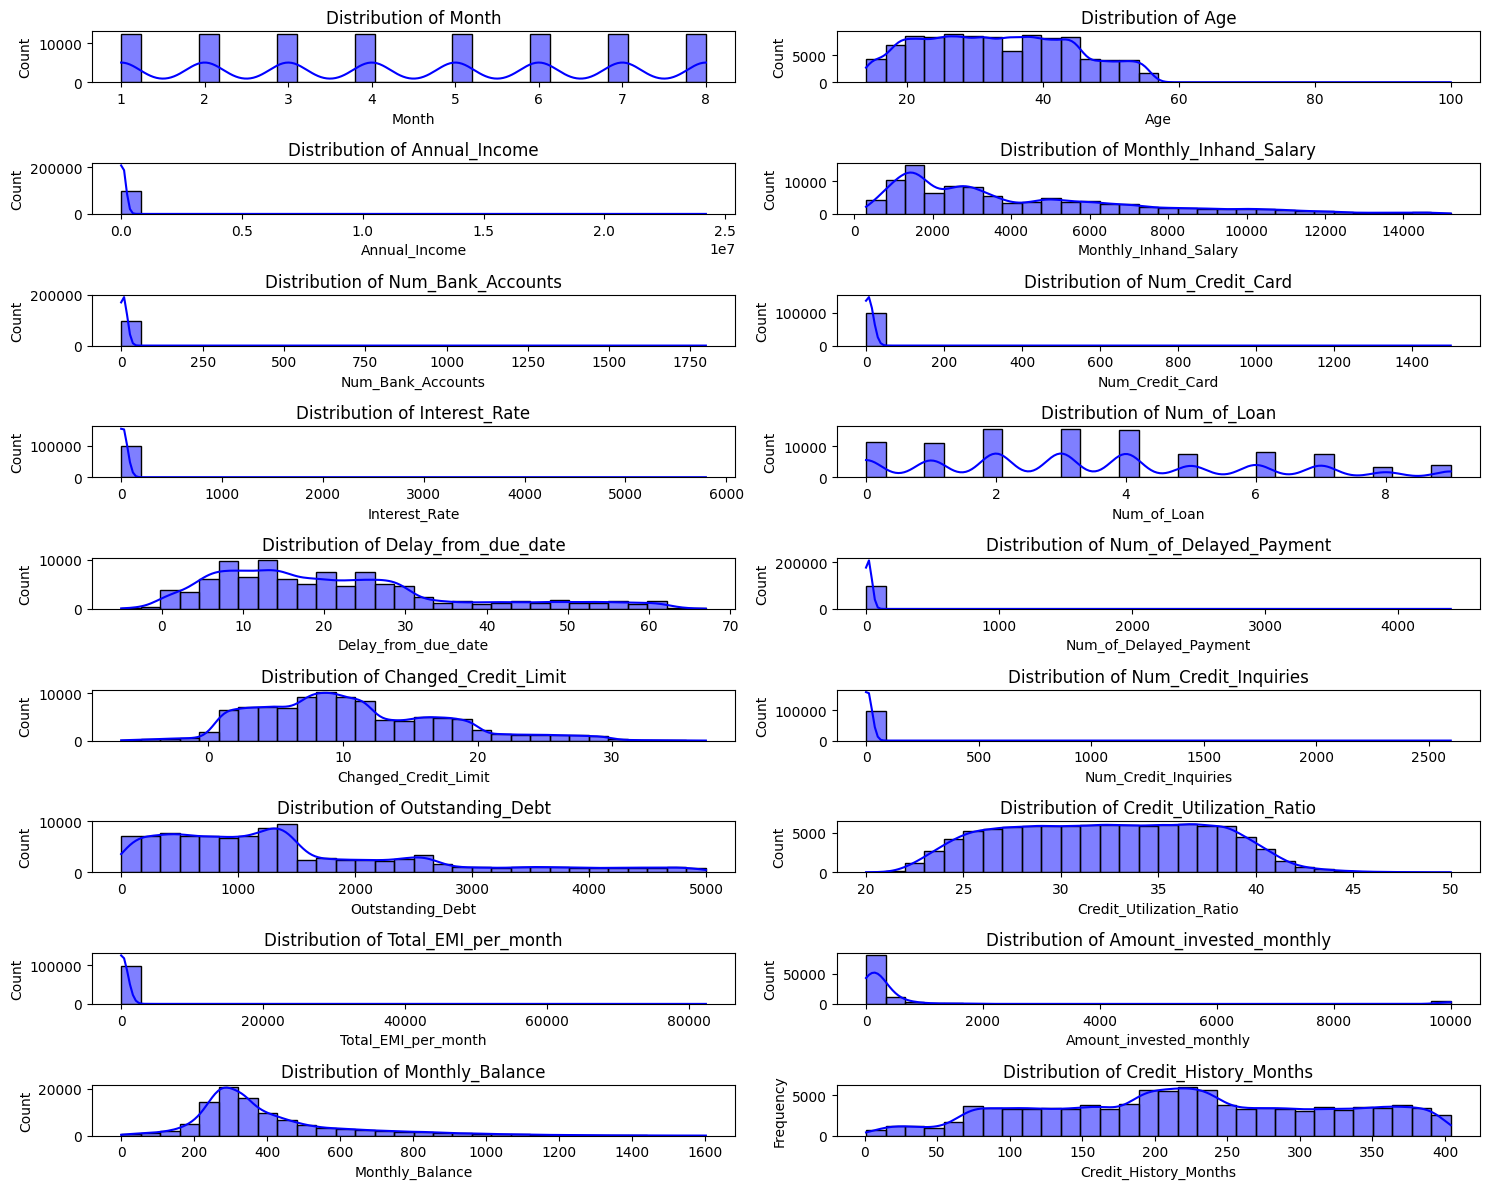

In [159]:
plt.figure(figsize=(15,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(9, 2, i)
    sns.histplot(credit_train_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show();

In [160]:
credit_train_data.skew(numeric_only=True)

Month                        0.000000
Age                          0.165299
Annual_Income               12.512173
Monthly_Inhand_Salary        1.128667
Num_Bank_Accounts           11.202482
Num_Credit_Card              8.458017
Interest_Rate                9.006015
Num_of_Loan                  0.445609
Delay_from_due_date          0.966395
Num_of_Delayed_Payment      12.251981
Changed_Credit_Limit         0.639829
Num_Credit_Inquiries         9.339111
Outstanding_Debt             1.207536
Credit_Utilization_Ratio     0.028616
Total_EMI_per_month          7.102524
Amount_invested_monthly      4.379794
Monthly_Balance              1.613454
Credit_History_Months       -0.048946
dtype: float64

In [161]:
# List of columns you want to apply IQR-based capping to
cols_to_cap = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
    'Credit_History_Months',"Age","Outstanding_Debt"
]

for col in cols_to_cap:
    if col in credit_train_data.columns:
        Q1 = credit_train_data[col].quantile(0.25)
        Q3 = credit_train_data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define caps
        lower_cap = Q1 - 1.5 * IQR
        upper_cap = Q3 + 1.5 * IQR

        # Apply capping
        credit_train_data[col] = credit_train_data[col].clip(lower=lower_cap, upper=upper_cap)


In [162]:
credit_train_data.skew(numeric_only=True)

Month                       0.000000
Age                         0.157516
Annual_Income               1.039972
Monthly_Inhand_Salary       1.014752
Num_Bank_Accounts           0.017034
Num_Credit_Card             0.430034
Interest_Rate               0.585315
Num_of_Loan                 0.445609
Delay_from_due_date         0.858944
Num_of_Delayed_Payment     -0.051377
Changed_Credit_Limit        0.611394
Num_Credit_Inquiries        0.619045
Outstanding_Debt            0.996622
Credit_Utilization_Ratio    0.028519
Total_EMI_per_month         1.140547
Amount_invested_monthly     1.120750
Monthly_Balance             0.831888
Credit_History_Months      -0.048946
dtype: float64

In [163]:
# List of columns to transform
log_transform_cols = [
    'Annual_Income', 'Monthly_Inhand_Salary',
    'Total_EMI_per_month', 'Amount_invested_monthly'
]

# Apply log(1 + x) to handle zeros safely
for col in log_transform_cols:
    credit_train_data[col] = np.log1p(credit_train_data[col])


In [164]:
credit_train_data.skew(numeric_only=True)

Month                       0.000000
Age                         0.157516
Annual_Income              -0.085580
Monthly_Inhand_Salary      -0.157927
Num_Bank_Accounts           0.017034
Num_Credit_Card             0.430034
Interest_Rate               0.585315
Num_of_Loan                 0.445609
Delay_from_due_date         0.858944
Num_of_Delayed_Payment     -0.051377
Changed_Credit_Limit        0.611394
Num_Credit_Inquiries        0.619045
Outstanding_Debt            0.996622
Credit_Utilization_Ratio    0.028519
Total_EMI_per_month        -1.298147
Amount_invested_monthly    -0.359207
Monthly_Balance             0.831888
Credit_History_Months      -0.048946
dtype: float64

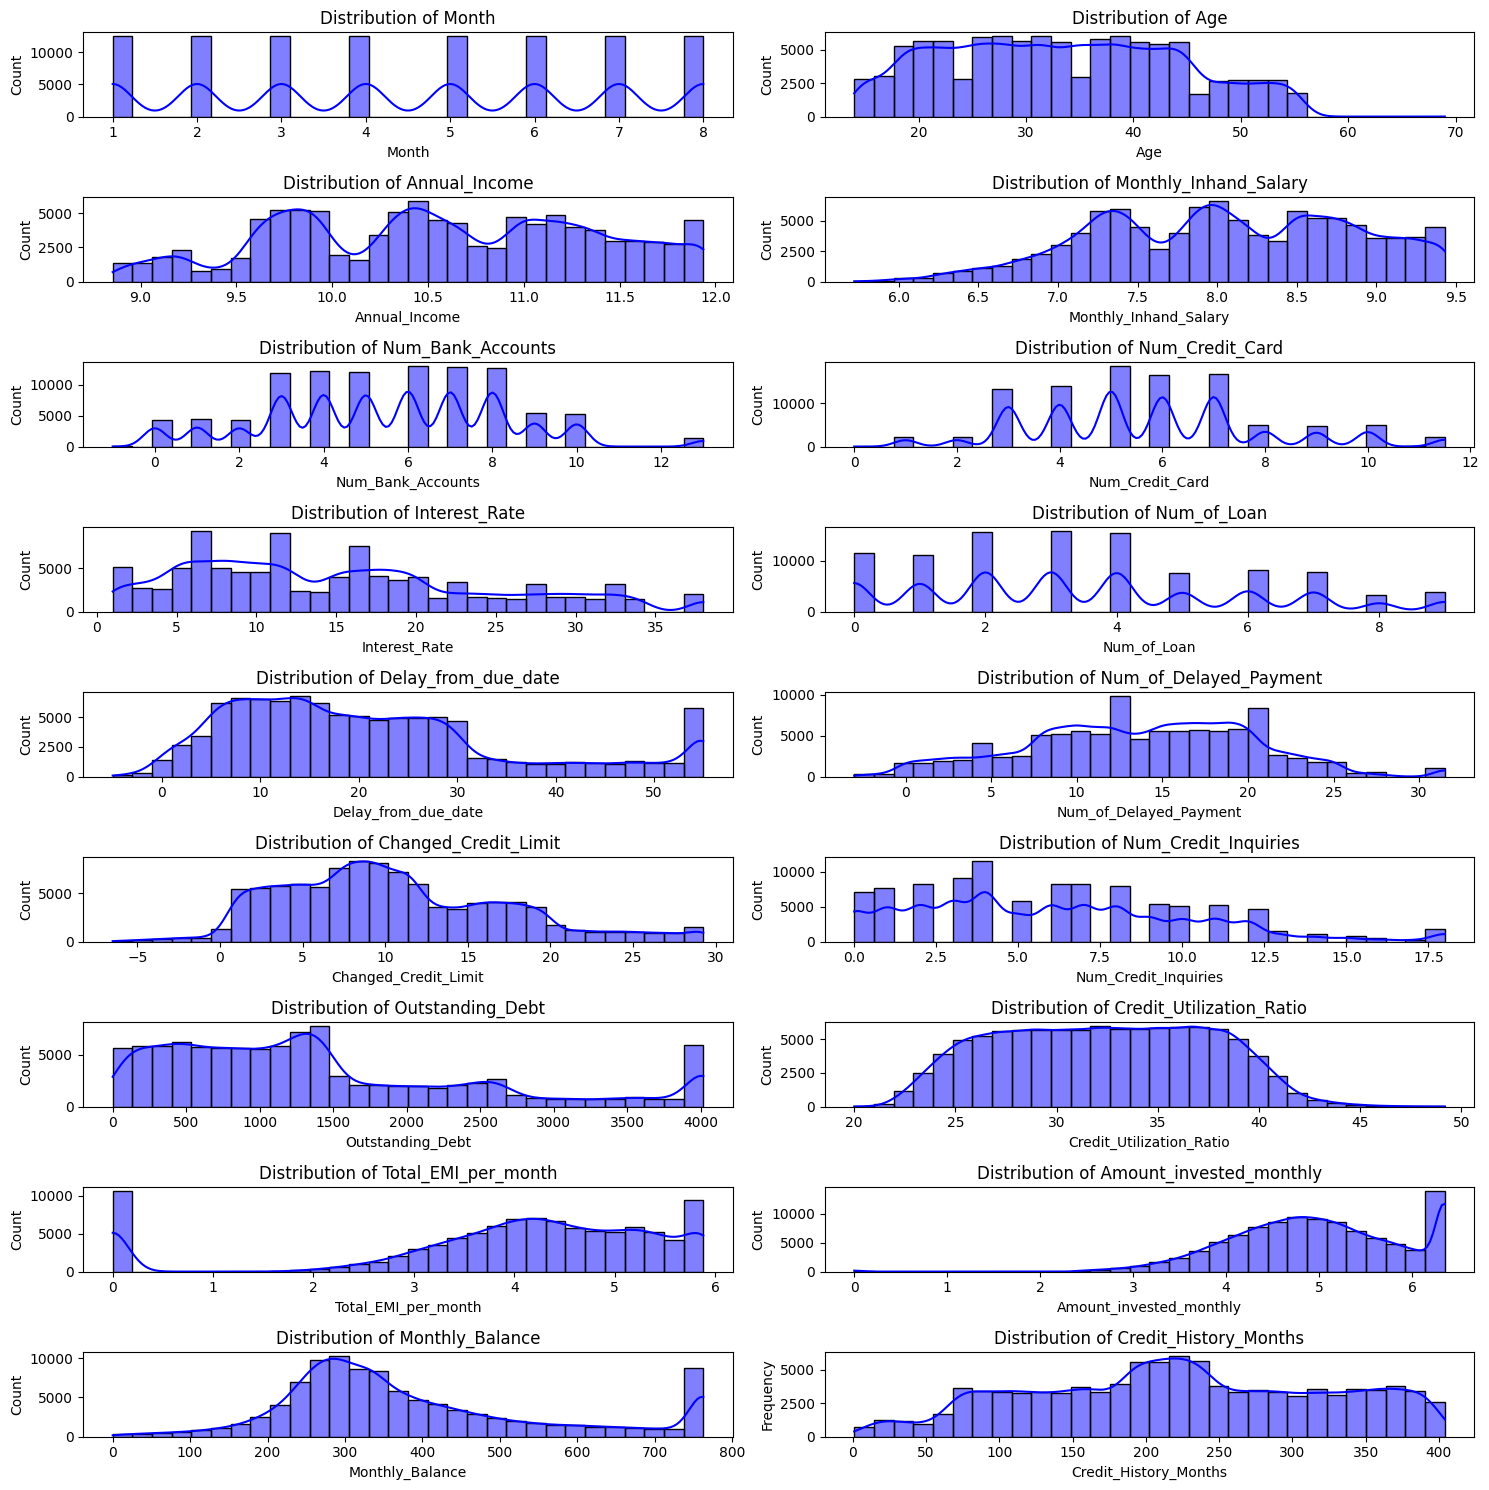

In [165]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(9, 2, i)
    sns.histplot(credit_train_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show();

In [166]:
# Applying ANOVA F-test

num_cols = credit_train_data.select_dtypes(include="number").columns

from sklearn.feature_selection import f_classif


X_num = credit_train_data[num_cols]
y = credit_train_data["Credit_Score"]

f_values, p_values = f_classif(X_num, y)

for col, f, p in zip(X_num.columns, f_values, p_values):
    print(f"{col}: F-score = {f:.2f}, p-value = {p:.4f}")

# F Value greater means imp feature

Month: F-score = 74.55, p-value = 0.0000
Age: F-score = 1334.14, p-value = 0.0000
Annual_Income: F-score = 2321.61, p-value = 0.0000
Monthly_Inhand_Salary: F-score = 2314.88, p-value = 0.0000
Num_Bank_Accounts: F-score = 8116.60, p-value = 0.0000
Num_Credit_Card: F-score = 7721.68, p-value = 0.0000
Interest_Rate: F-score = 12452.06, p-value = 0.0000
Num_of_Loan: F-score = 7440.63, p-value = 0.0000
Delay_from_due_date: F-score = 11687.65, p-value = 0.0000
Num_of_Delayed_Payment: F-score = 7803.34, p-value = 0.0000
Changed_Credit_Limit: F-score = 2682.91, p-value = 0.0000
Num_Credit_Inquiries: F-score = 9446.76, p-value = 0.0000
Outstanding_Debt: F-score = 9853.23, p-value = 0.0000
Credit_Utilization_Ratio: F-score = 105.28, p-value = 0.0000
Total_EMI_per_month: F-score = 797.21, p-value = 0.0000
Amount_invested_monthly: F-score = 671.51, p-value = 0.0000
Monthly_Balance: F-score = 2370.00, p-value = 0.0000
Credit_History_Months: F-score = 8902.31, p-value = 0.0000


In [167]:
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Loop through all object columns except the target
categorical_columns = credit_train_data.select_dtypes(include='object').columns.drop('Credit_Score')

for col in categorical_columns:
    contingency_table = pd.crosstab(credit_train_data['Credit_Score'], credit_train_data[col])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    cramer_v = cramers_v(contingency_table)

    print(f"\n--- {col} ---")
    print(f"Chi-squared statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    #print(f"Cramér's V: {cramer_v:.4f}")



--- Occupation ---
Chi-squared statistic: 180.6859
P-value: 0.0000

--- Credit_Mix ---
Chi-squared statistic: 32349.2994
P-value: 0.0000

--- Payment_of_Min_Amount ---
Chi-squared statistic: 19620.3948
P-value: 0.0000

--- Payment_Behaviour ---
Chi-squared statistic: 1529.6976
P-value: 0.0000


### Dropping `Occupation`, `Month`,`Credit_Utilization_Ratio`,`Total_EMI_per_month`,`Amount_invested_monthly` Not that much significant according to the above test.

In [168]:
cols_to_drop = [
    "Occupation",
    'Month',
    'Credit_Utilization_Ratio',
    'Amount_invested_monthly',
    'Total_EMI_per_month'
]

credit_train_data = credit_train_data.drop(columns=cols_to_drop)

In [169]:
credit_train_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
0,17,10.329635,7.903656,6,5.0,27,2.0,55,25.0,1.63,10,Bad,1562.910034,Yes,Low_spent_Large_value_payments,252.919998,Standard,122
1,17,10.329635,7.903656,6,5.0,27,2.0,55,23.0,1.63,11,Bad,1562.910034,Yes,High_spent_Small_value_payments,311.540009,Poor,123
2,17,10.329635,7.903656,6,5.0,27,2.0,55,28.0,1.63,11,Bad,1562.910034,Yes,High_spent_Medium_value_payments,368.619995,Poor,124
3,17,10.329635,7.903656,6,5.0,27,2.0,55,25.0,1.63,11,Bad,1562.910034,Yes,High_spent_Medium_value_payments,419.769989,Poor,125
4,17,10.329635,7.903656,6,5.0,27,2.0,55,25.0,2.63,11,Bad,1562.910034,Yes,Low_spent_Large_value_payments,305.839996,Poor,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,29,10.631023,8.229743,8,7.0,13,6.0,19,12.0,10.07,7,Unknown,1701.880005,Yes,High_spent_Medium_value_payments,247.660004,Standard,221
99996,29,10.631023,8.229743,8,7.0,13,6.0,23,12.0,10.07,7,Standard,1701.880005,Yes,High_spent_Medium_value_payments,337.380005,Standard,222
99997,29,10.631023,8.229743,8,7.0,13,6.0,23,12.0,10.07,7,Standard,1701.880005,Yes,High_spent_Medium_value_payments,395.000000,Standard,223
99998,30,10.631023,8.229743,8,7.0,13,6.0,23,12.0,10.07,7,Standard,1701.880005,Yes,High_spent_Small_value_payments,194.020004,Good,224


## Model Preparation

In [170]:
target_col = 'Credit_Score'
X = credit_train_data.drop(columns=[target_col])
y = credit_train_data[target_col]

In [171]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [172]:
# le = LabelEncoder()
# y_encoded = le.fit_transform(credit_train_data['Credit_Score'])

# print(dict(zip(le.classes_, le.transform(le.classes_))))

In [173]:
credit_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     100000 non-null  int32  
 1   Annual_Income           100000 non-null  float64
 2   Monthly_Inhand_Salary   100000 non-null  float64
 3   Num_Bank_Accounts       100000 non-null  int64  
 4   Num_Credit_Card         100000 non-null  float64
 5   Interest_Rate           100000 non-null  int64  
 6   Num_of_Loan             100000 non-null  float64
 7   Delay_from_due_date     100000 non-null  int64  
 8   Num_of_Delayed_Payment  100000 non-null  float64
 9   Changed_Credit_Limit    100000 non-null  float64
 10  Num_Credit_Inquiries    100000 non-null  int32  
 11  Credit_Mix              100000 non-null  object 
 12  Outstanding_Debt        100000 non-null  float64
 13  Payment_of_Min_Amount   100000 non-null  object 
 14  Payment_Behaviour    

In [189]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# ✅ Feature column definitions
numeric_features = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Monthly_Balance', 'Credit_History_Months'
]

categorical_features = [
    'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'
]

# ✅ Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# ✅ Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# ✅ Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ✅ Encode target (Credit_Score)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Assuming y corresponds to X_train

# ✅ Final model pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# ✅ Train the pipeline
final_pipeline.fit(x_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_Credit_Inquiries',
                                                   'Outstanding_Debt',
                                                   'Monthly_Balance',
                                                   'Credit_History_Months']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Credit_Mix',
                                                   'Payment_of_Min_Amount',
                                                   'Payment_Behaviour'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [190]:
y_pred_encoded = final_pipeline.predict(x_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test_encoded = label_encoder.transform(y_test)
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.7940


In [191]:
import numpy as np
import pandas as pd

# 1. Get the trained RandomForest model from pipeline
rf_model = final_pipeline.named_steps['classifier']

# 2. Get the preprocessor from the pipeline
preprocessor = final_pipeline.named_steps['preprocessor']

# 3. Get numeric feature names
numeric_features = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Monthly_Balance', 'Credit_History_Months'
]

# 4. Get categorical feature names after OneHotEncoding
cat_ohe = preprocessor.named_transformers_['cat'].named_steps['encoder']
categorical_features = [
    'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'
]
cat_feature_names = cat_ohe.get_feature_names_out(categorical_features)

# 5. Combine all feature names in order
all_features = np.concatenate([numeric_features, cat_feature_names])

# 6. Get feature importances from RF
importances = rf_model.feature_importances_

# 7. Create DataFrame for better visualization
feature_importances = pd.DataFrame({
    'feature': all_features,
    'importance': importances
})

# 8. Sort by importance descending
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print(feature_importances)


                                              feature  importance
11                                   Outstanding_Debt    0.119377
5                                       Interest_Rate    0.083911
13                              Credit_History_Months    0.082175
9                                Changed_Credit_Limit    0.069433
7                                 Delay_from_due_date    0.067573
12                                    Monthly_Balance    0.060947
2                               Monthly_Inhand_Salary    0.053007
8                              Num_of_Delayed_Payment    0.051173
1                                       Annual_Income    0.050953
0                                                 Age    0.048102
10                               Num_Credit_Inquiries    0.047882
4                                     Num_Credit_Card    0.043097
3                                   Num_Bank_Accounts    0.033296
6                                         Num_of_Loan    0.033076
16        